In [1]:
from IPython.display import display, HTML

display(HTML(data="""

<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import numpy as np
import matplotlib.pyplot as plt
import time

import datetime
from math import *
import scipy.linalg
import scipy.integrate

%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 7) 

import os
import inspect
curr_path = "C:\\Users\\nicol\Documents\Work\ENS related stuff\M1\Stage M1\Code\Python"
path_data = curr_path+"\data"
os.chdir(path_data)


col = ['b', 'r', 'g', 'k', 'purple', 'p']
linestyles = ["-", "-.", ":", "--", (0, (10, 2, 1, 2, 1, 2))]
markers = ['o', 's', '^', 'v', 'h']

In [2]:
from formalism import init_gaussian_nD, update_param_1D_order2, _analyze_order, simu, display, _mk_spec_from_param

from post_processing import _plot_std_from_param, _cov_mat_state, _get_entrop_from_param, _mk_spread_map_1D_from_param

from utils import mk_stamp

from quantum_and_walks import normalize

In [3]:
#GLobal params
param = {}

dim=1
param['dim'] = dim
simu_type =  'o2'

param['eps'] = .01
param['a'] = 1/2
param['b'] = 1/2
param['c'] = 1/2

dxs = [param['eps']**param['a']]
param['Nt'] = 200
param['max_width'] = 200

param['ax1'] = 1
param['ax2'] = 3

param['theta_0_x'] = -np.pi
param['delta_x'] = np.pi/2
param['zeta_x'] = -3*np.pi/2
param['phi_x'] = np.pi/2

param['theta_0_y'] = -2*np.pi
param['delta_y'] = 0
param['zeta_y'] = -np.pi/2
param['phi_y'] = np.pi/2


param['tau'] = 1
param['order'] = 'M_B_Sx_A_Cy_Sx_Cx_T_Sx_R_Cy_Sx_Cx'
param['init'] = init_gaussian_nD((100,), dxs , var_mat = None, mu_vect=None, spin=np.array([1, 1]))


param['m'] = 0
param['theta_1'] = 0
param['alpha_1'] = 0

stamp = mk_stamp(dim)
param['stamp'] = stamp

update_function = update_param_1D_order2

print("\n\n\n")
param = update_function(param)
_=_analyze_order(param, talk=True)





The Unitary consists in the following process :
  ---> Coin with angles delta_x; theta_x; phi_x; zeta_x
  ---> Shift in direction  x
  ---> Coin with angles delta_y; theta_y; phi_y; zeta_y
  ---> Operator defined by matrix stored in parameters as  R
  ---> Shift in direction  x
  ---> Operator defined by matrix stored in parameters as  T
  ---> Coin with angles delta_x; theta_x; phi_x; zeta_x
  ---> Shift in direction  x
  ---> Coin with angles delta_y; theta_y; phi_y; zeta_y
  ---> Operator defined by matrix stored in parameters as  A
  ---> Shift in direction  x
  ---> Operator defined by matrix stored in parameters as  B
  ---> Operator defined by matrix stored in parameters as  M


# Fig1 : Density plot

<IPython.core.display.Javascript object>


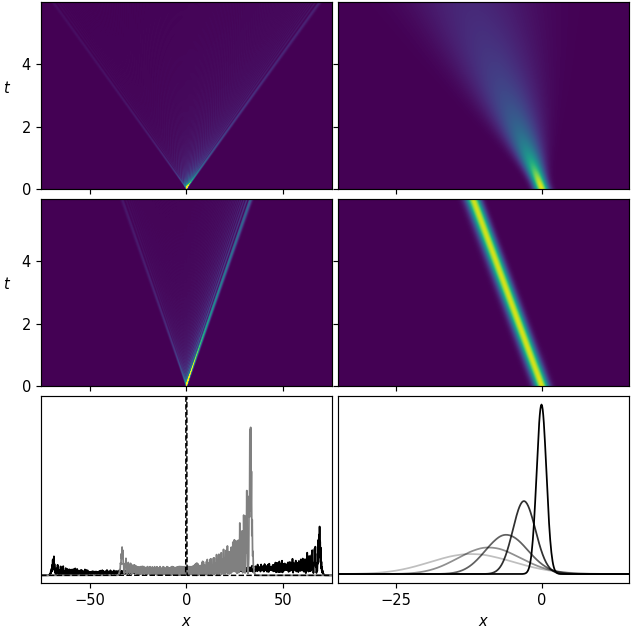

<IPython.core.display.Javascript object>


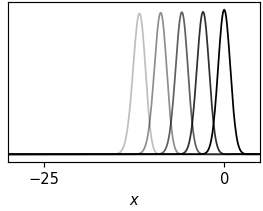

In [4]:
#FOR YY
param['eps'] = .01
sqe = np.sqrt(param["eps"])


param['Nt'] = 300
param['m']  = 0

param['max_width'] = 1001  

param['c'] = 0
param['ax1'] = 2
param['ax2'] = 2
param = update_function(param)



z_max = 0.05

rg_var = [.001, .07]
rg_a = [3, 1]
rg_thh = [np.pi/2, np.pi/2]
rg_ini = [[1,1-1j], [1,1j]]

rg_th = [1, 0]
cols = ['k', 'gray']

maxx1 = 100
minn1 = -100
maxx2 = 100
minn2 = -100
space = [np.linspace(minn1, maxx1, int((maxx1-minn1)/param['dxs'][0])+1), np.linspace(minn2, maxx2, int((maxx2-minn2)/param['dxs'][0])+1)]


fig, ax = plt.subplots(3,2, figsize = (6,6))

rg_special_times = [0, 1/4, 1/2, 3/4, 1]

for kkkk in range(2):
    for iiii in range(2):
        param['theta_1'] = rg_th[iiii]*rg_thh[kkkk]
        param['alpha_1'] = rg_a[kkkk]
        param['init'] = init_gaussian_nD((100,), param['dxs'] , var_mat =[[rg_var[kkkk]]], mu_vect=None, spin=rg_ini[kkkk])
        param = update_function(param)
        mat, X, Y =  _mk_spread_map_1D_from_param(param, z_max = None, X = space[kkkk], bool_plot = False)
        Y = np.linspace(0, 1, len(mat))*param['Nt']*param['dt']*2 #accout for tau
        ax[iiii,kkkk].imshow(mat, aspect ='auto', vmax = z_max, origin = 'lower', extent = (X[0], X[-1], Y[0], Y[-1]), interpolation = None)
        ax[iiii,kkkk].set_xlabel(r"$x$")
        ax[iiii,kkkk].set_ylabel(r"$t$", rotation = 0, labelpad = 10)
        final, _ = simu(param, bool_save=False, force  =True, talk = False)
        frame = [space[kkkk]]
        pb = mat[-1]
        
        if kkkk == 0:
            frame = [space[kkkk]]
            pb = mat[-1]
            ax[2,kkkk].plot(frame[0],  pb, color = cols[iiii], linewidth = 1.2)
            ax[2,kkkk].set_xlabel(r"$x$")


        if kkkk == 1 and iiii == 0:
            for spe in range(len(rg_special_times)):
                frame = [space[kkkk]]
                pb = mat[int((len(mat)-1)*rg_special_times[spe])]
                ax[2,kkkk].plot(frame[0], pb, color =cols[0], alpha = 1- 3/4 * rg_special_times[spe], linewidth = 1.2)
                ax[2,kkkk].set_xlabel(r"$x$")


frame, pb = display(init_gaussian_nD((100,), param['dxs'] , var_mat =[[rg_var[0]]], mu_vect=None, spin=rg_ini[0]), param['dxs'], frame = [space[0]])
def gauss_useless(x, A, m, s):
    return A*1/sqrt(2*np.pi*s**2)*np.exp(-1/2 * (x-m)**2 / s**2)
pamm, qual = scipy.optimize.curve_fit(gauss_useless, frame[0], pb)
aaaa=np.linspace(minn1,maxx1, 100000)
ax[2,0].plot(aaaa, gauss_useless(aaaa, pamm[0], pamm[1], pamm[2]), color=cols[0], linestyle = '--', linewidth = 1)
ax[2,0].set_ylim([-0.001, 0.025])

ax[2,0].set_yticks([])
ax[2,1].set_yticks([])

labels_time = [0, 2, 4]
ax[0,1].set_yticks(labels_time, [None]*len(labels_time))
ax[0,0].set_yticks(labels_time)
ax[0,1].set_ylabel(None)
ax[1,1].set_yticks(labels_time, [None]*len(labels_time))
ax[1,0].set_yticks(labels_time)
ax[1,1].set_ylabel(None)

labels_space = [-50, 0, 50]
ax[0, 0].set_xticks(labels_space, [None]*len(labels_space))
ax[1, 0].set_xticks(labels_space, [None]*len(labels_space))
ax[2, 0].set_xticks(labels_space)
ax[0, 0].set_xlabel(None)
ax[1, 0].set_xlabel(None)

labels_space = [-25, 0, 25]
ax[0, 1].set_xticks(labels_space, [None]*len(labels_space))
ax[1, 1].set_xticks(labels_space, [None]*len(labels_space))
ax[2, 1].set_xticks(labels_space)
ax[0, 1].set_xlabel(None)
ax[1, 1].set_xlabel(None)


left_x = [-75, 75]
ax[0,0].set_xlim(left_x)
ax[1,0].set_xlim(left_x)
ax[2,0].set_xlim(left_x)

right_x = [-35, 15]
ax[0,1].set_xlim(right_x)
ax[1,1].set_xlim(right_x)
ax[2,1].set_xlim(right_x)




plt.tight_layout(pad=0.2, w_pad=.1, h_pad=.1)
#plt.savefig('plotmap_v2.png', dpi = 300)

plt.figure(figsize = (2.5, 2))
Nt = param['Nt']
for spe in range(len(rg_special_times)):
    mat, X, Y =  _mk_spread_map_1D_from_param(param, z_max = None, X = space[kkkk], bool_plot = False)
    frame = [space[kkkk]]
    pb = mat[int((len(mat)-1)*rg_special_times[spe])]
    plt.plot(frame[0], pb, color=cols[0], alpha = 1- 3/4 * rg_special_times[spe], linewidth = 1.2)
    plt.xlabel(r"$x$")
param['Nt'] = Nt

plt.gca().set_yticks([])
plt.gca().set_xticks([-25, 0])
plt.xlim([-30, 5])
plt.tight_layout(pad=0.2, w_pad=.1, h_pad=.1)
#plt.savefig('insert_plotmap_V2.png', dpi = 300)
plt.show()

# Fig2 : Effective spectrum

In [5]:
param['eps'] = 1
sqe = np.sqrt(param["eps"])

param['c'] = 0
param['ax1'] = 2
param['ax2'] = 2

param = update_function(param)


rg_a = [0, np.pi/3, np.pi/3]
rg_th = [1, 0, np.pi/5]


absc = np.linspace(-np.pi/2-np.pi/20, np.pi/2+np.pi/20, 200+1)/(param["eps"]**param['a'])
ords = []

for kk in range(len(rg_a)):
    param['alpha_1'] = rg_a[kk]
    param['theta_1'] = rg_th[kk]
    param = update_function(param)

    ordo = _mk_spec_from_param(param, frame = [absc], bool_plot = False)
    ords.append(ordo)

<IPython.core.display.Javascript object>


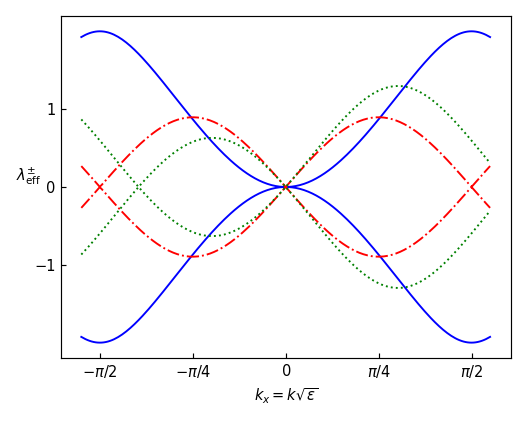

In [6]:
plt.figure(figsize = (5, 4))
for kk in range(0,len(rg_a)):
    y = ords[kk].real
    plt.plot(absc*param['eps']**param['a'], y , color = col[kk], linestyle = linestyles[kk], linewidth = 1.3)


plt.xlabel(r'$k_x = k \sqrt{\varepsilon}$')
plt.ylabel(r'$\lambda_{\mathrm{eff}} ^{\pm}$', rotation = 0)

plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], [r'$-\pi/2$', r'$-\pi/4$',r'$0$',r'$\pi/4$', r'$\pi/2$'])
plt.yticks([-1, 0, 1])

plt.gca().tick_params(axis = 'both', direction = 'in')
plt.tight_layout()
plt.show()

#plt.savefig('test.png', dpi = 400)

# Fig3 : Theoretical spectrum (?)

<IPython.core.display.Javascript object>


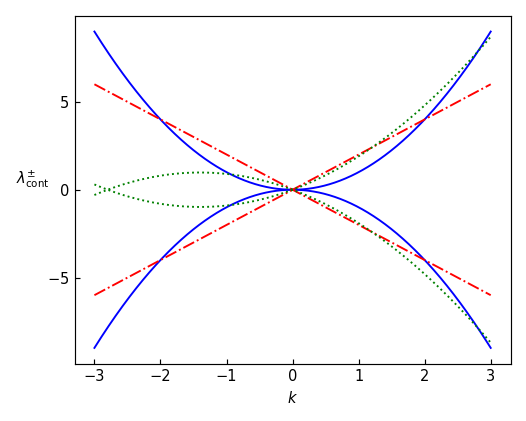

In [7]:
rg_m = [0,0,0]
rg_a = [0, 1, .7, .4]
rg_th = [np.pi/2, 0, np.pi/6, np.pi/3] 


borneS = 3
borneI = -3
absc = np.linspace(borneI, borneS, 10000)
ords = []

for kk in range(len(rg_m)):
    alpha_1 = rg_a[kk]
    theta = rg_th[kk]
    mm = rg_m[kk]

    lam = np.sqrt(mm**2 + absc**2*(2*alpha_1 + absc*np.sin(theta))**2 )

    ordo = [[la, -la] for la in lam]
    ords.append(ordo)
    

plt.figure(figsize = (5, 4))
for kk in range(len(rg_m)):
    y = ords[kk]
    plt.plot(absc, y , color = col[kk], linestyle = linestyles[kk], linewidth = 1.3)


plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda_{\mathrm{cont}} ^{\pm}$', rotation = 0, labelpad = 10)

plt.yticks([-5, 0,5], [r'$-5$',r'$0$',r'$5$' ])

plt.gca().tick_params(axis = 'both', direction = 'in')
plt.tight_layout()
plt.show()

#plt.savefig('test.pdf')

# Fig4 : Variance

In [8]:
def mk_var_pred(param, corr_th = 1, corr_a = 1):
    var0 = _cov_mat_state(param['init'], param['dxs'])[0,0]
    sp = normalize(param['init'][int(len(param['init'])//2)])    
    alpha_1 = param['alpha_1']
    theta_1 = param['theta_1']
    im_prod_ci = -(normalize(sp)[0]*np.conjugate(normalize(sp)[1])).imag
    def pred_var(t):
        return  var0 + corr_th**2 /var0 *np.sin(theta_1)**2 *t**2 + corr_a**2 * 4*alpha_1**2 * (1- 4*im_prod_ci**2) * t**2 
    return pred_var

In [9]:
param['eps'] = .01
sqe = np.sqrt(param["eps"])

param["ax1"] = 2
param["ax2"] = 2
param['c'] = 0

param['Nt'] = 300

param = update_function(param)



var_mat =[[[.01]], [[.3]], [[.03]], [[.003]]]
rg_a = [0, 0.9 , 1.1]
rg_CI = [[1,1j], [1,0], [1,1+1j]] 
rg_th = [np.pi/2, 0, 2] 


abscs = []
ords = []

for kk in range(len(rg_CI)):
    sp = rg_CI[kk]
    param['init'] = init_gaussian_nD((100,), param["dxs"] , var_mat = var_mat[kk], mu_vect=None, spin=sp)
    param['alpha_1'] = rg_a[kk]
    param['theta_1'] = rg_th[kk]
    param = update_function(param)

    x,y = _plot_std_from_param(param, bool_plot = False)
    y = y[:, 0,0]
    x = np.linspace(0, 1, len(y))*param['Nt']*param['dt']*2 #accout for tau
    
    abscs.append(x)
    ords.append(y)

<IPython.core.display.Javascript object>


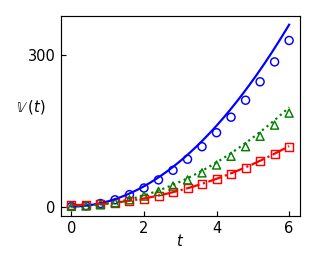

Max Error for  b 8.674253409152497 %
Final Error for  b 8.674253409152497 %

Max Error for  r 1.3582923147553059 %
Final Error for  r 1.3582923147553059 %

Max Error for  g 7.072297408370079 %
Final Error for  g 5.742914880294116 %



In [10]:
freq_dot = 20

plt.figure(figsize = (3, 2.5))
for kk in range(len(rg_CI)):
    x = abscs[kk]
    y = ords[kk]
    plt.scatter(x[::freq_dot],y[::freq_dot], color = col[kk], marker = markers[kk], s=30, facecolors='none')

    sp = rg_CI[kk]
    param['init'] = init_gaussian_nD((100,), param["dxs"] , var_mat = var_mat[kk], mu_vect=None, spin=sp)
    param['alpha_1'] = rg_a[kk]
    param['theta_1'] = rg_th[kk]
    param = update_function(param)
    fct_pred_v = mk_var_pred(param)
    plt.plot(abscs[kk], fct_pred_v(abscs[kk]), color = col[kk], linestyle = linestyles[kk])
    
    print("Max Error for ", col[kk], np.max(np.abs(fct_pred_v(abscs[kk]) - ords[kk])/np.abs(fct_pred_v(abscs[kk])))*100, "%")
    print("Final Error for ", col[kk], (np.abs(fct_pred_v(abscs[kk]) - ords[kk])/np.abs(fct_pred_v(abscs[kk])))[-1]*100, "%\n")

plt.xlabel(r"$t$", labelpad = -2)
plt.ylabel(r"$\mathbb{V}~(t)$", rotation = 0, labelpad = -2)

plt.gca().tick_params(axis = 'both', direction = 'in')

labels_space = [0, 300]
plt.yticks(labels_space)

labels_time = [0, 2, 4, 6]
plt.xticks(labels_time)

plt.tight_layout()
plt.show()

#plt.savefig('vary.pdf')

# Fig5 : Gapped Spectrum

In [11]:
param['eps'] = 1
sqe = np.sqrt(param["eps"])

param['ax1'] = 1
param['ax2'] = 3

param = update_function(param)

rg_a = [0, np.pi/(3*sqe), np.pi/(4*sqe), np.pi/(3*sqe)]
rg_th = [np.pi/2, 0, .1, np.pi/5]


absc = np.linspace(-np.pi/2-np.pi/20, np.pi/2+np.pi/20, 200+1)/(param["eps"]**param['a'])
ords = []

for kk in range(len(rg_a)):
    param['alpha_1'] = rg_a[kk]
    param['theta_1'] = rg_th[kk]
    param = update_function(param)

    ordo = _mk_spec_from_param(param, frame = [absc], bool_plot = False)
    ords.append(ordo)

<IPython.core.display.Javascript object>


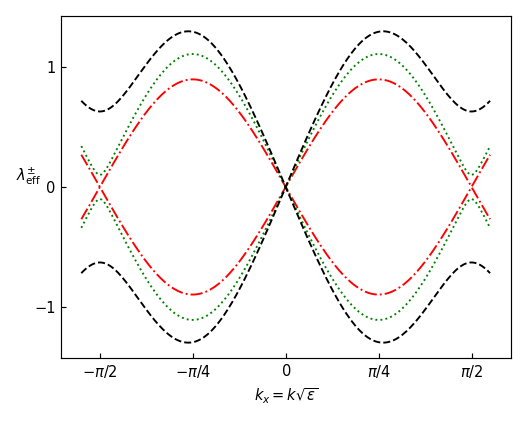

In [12]:
plt.figure(figsize = (5, 4))
for kk in range(1,len(ords)):
    y = ords[kk].real
    plt.plot(absc*param['eps']**param['a'], y , color = col[kk], linestyle = linestyles[kk], linewidth = 1.3)


plt.xlabel(r'$k_x = k \sqrt{\varepsilon}$')
plt.ylabel(r'$\lambda_{\mathrm{eff}} ^{\pm}$', rotation = 0)

plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], [r'$-\pi/2$', r'$-\pi/4$',r'$0$',r'$\pi/4$', r'$\pi/2$'])
plt.yticks([-1, 0, 1])

plt.gca().tick_params(axis = 'both', direction = 'in')
plt.tight_layout()
plt.show()

#plt.savefig('test.pdf', dpi = 400)

# Fig6 : Entropy

In [13]:
param['eps'] = .01
param['Nt'] = 300
sqe = np.sqrt(param["eps"])

param['c'] = 0

param['ax1'] = 2
param['ax2'] = 2

sp = [1, 1j]
param['init'] = init_gaussian_nD((30,), dxs , var_mat =None, mu_vect=None, spin=sp)
    
param = update_function(param)


rg_a = [0, .2, 2, .5, 2]
rg_th = [2*np.pi/3, 0, np.pi/2, np.pi/2, np.pi] 

abscs = []
ords = []

for kk in range(len(rg_a)):
    param['alpha_1'] = rg_a[kk]
    param['theta_1'] = rg_th[kk]
    param = update_function(param)

    absc, ordo = _get_entrop_from_param(param, bool_figure = False)
    ords.append(ordo)
    abscs.append(absc)

<IPython.core.display.Javascript object>


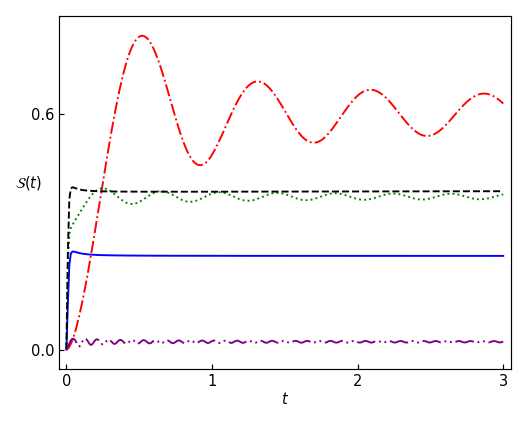

In [14]:
plt.figure(figsize = (5, 4))
for kk in range(len(rg_a)):
    x = abscs[kk]
    y = ords[kk]
    plt.plot(x, y , color = col[kk], linestyle = linestyles[kk], linewidth = 1.3)


plt.xlabel(r'$t$', labelpad=1)
plt.ylabel(r'$\mathcal{S}(t)$', rotation = 0, labelpad=1)

plt.gca().tick_params(axis = 'both', direction = 'in')

plt.xticks([0, 1, 2, 3])
plt.yticks([0, .6])

plt.xlim([-.05, 3.05])
plt.ylim([-.05, .85])
plt.tight_layout()
plt.show()

#plt.savefig('test.pdf')